In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Animal Detector (Object Detection Task)

In [ ]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
animals = 'Lion', 'Tiger','Cheetah'
path = '/content/gdrive/MyDrive/Datasets/Animal_Detection'
p_path=Path(path)
fns = get_image_files(path)
fns

(#291) [Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/right-shave-closeup-square.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/4732HSAJ3BB2NAG4YVXDQ4EEHU.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/_96974103_gettyimages-cheetah.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/hero-cheetah-sunup_2.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/cheetah (4).jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/original.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/cheetah.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/https_3A_2F_2Fcloudfront-us-east-2.images.arcpublishing.com_2Freuters_2FEVVSEEIQ5RIYLD3Q72DZTJTM4A.jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/Cheetah (6).jpg'),Path('/content/gdrive/MyDrive/Datasets/Animal_Detection/Cheetah/jpg_revision_latest_scale-to-width-down_.jpg')...]

The first line is a list of the animals we would be classifying, make sure the names are exactly the same as the ones used to name the folders containing each dataset.
The second and third line are used to initialize the path/directory to our dataset.
The last lines get all the images in each folder in our path (from the lines above).

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

The Data loaders class is used to transform our dataset to training and validation sets.

> Indented block




In [ ]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

This is our datablock API, we are using it to pass information to our data loaders class about the kind of data we are working on ('blocks=(ImageBlock, CategoryBlock)'), how the data loaders class will get the data ('get_items=get_image_files'), how the validation set is to be created ('splitter=RandomSplitter(valid_pct=0.2, seed=42)'), and how to get the labels for our data set ('get_y=parent_label') which in this case is from the name of the folder our files are in.This can be seen as a template which will be used by our data loaders class.

In [ ]:
failed = verify_images(fns)
failed

(#0) []

This line simplt checks if we have any images that werent downloaded properly.

In [ ]:
dls = images.dataloaders(path)

Here we are passing our data block to our data loaders class and also specifying the location of our datasets.

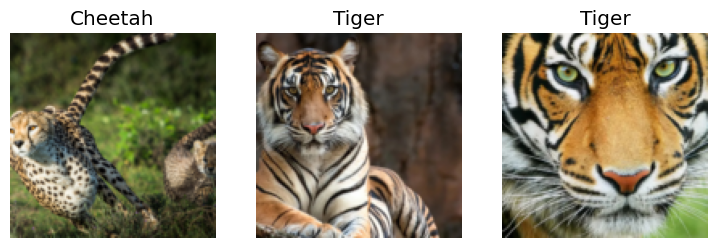

In [ ]:
dls.valid.show_batch(max_n=3, nrows=1)

The code above shows a batch of three images('max_n=3')  from our validation set('dls.valid.show_batch'), all arranged in a single row('nrows=1')       

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.734799,0.384378,0.103448,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.769018,0.223908,0.068965,00:12
1,0.573950,0.108465,0.068965,00:12
2,0.432604,0.072760,0.034483,00:12
3,0.330944,0.066895,0.034483,00:13
4,0.267574,0.067922,0.034483,00:12
5,0.227605,0.070201,0.034483,00:11


This is where we create our learner/model, using the resnet18 architecture which is an a pretrained model with error rate as our metrics. We trained our model over 6 epochs as in the second line and our model was able to get an error rate of 0.07 in its fourth epoch compared to 0.23 in the first epoch. This is a good result.

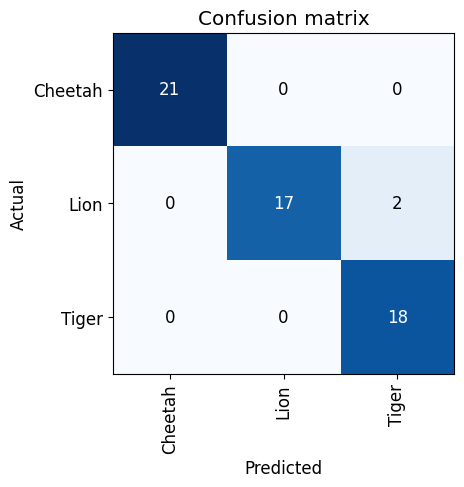

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

We want to have a look at our models performance on our validation set.our model was able to classify all images correctly aside from a Lion which was wrongly classified as a Tiger in its predictions. We would have a look at the wrongly predicted image in the next cell.

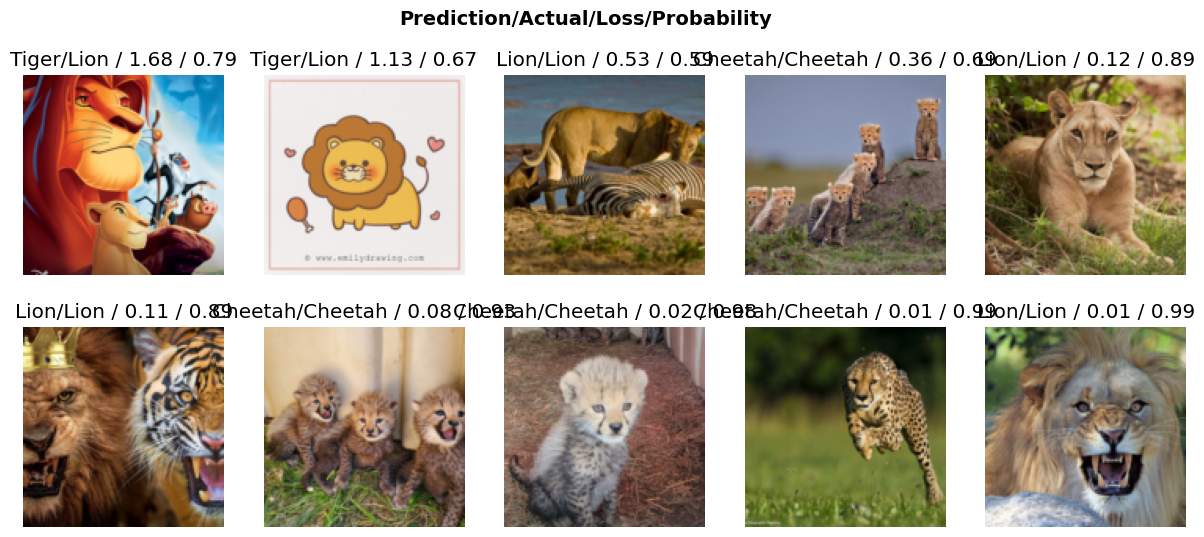

In [ ]:
interp.plot_top_losses(10, nrows=2)

The code above shows us the images with the highest losses. Each image is labelled with its predicted label, actual label, loss and probability respectively. This is how we check for images that are classified wrongly.

## Vision Segmentation Task

In [ ]:
from fastai.vision.all import *
import numpy as np

# Download and extract the dataset
path = untar_data(URLs.CAMVID)
print(path.ls())

[Path('/root/.fastai/data/camvid/valid.txt'), Path('/root/.fastai/data/camvid/codes.txt'), Path('/root/.fastai/data/camvid/images'), Path('/root/.fastai/data/camvid/labels')]


In [ ]:
# Load the codes
codes = np.loadtxt(path/'codes.txt', dtype=str)
print(codes)

['Animal' 'Archway' 'Bicyclist' 'Bridge' 'Building' 'Car'
 'CartLuggagePram' 'Child' 'Column_Pole' 'Fence' 'LaneMkgsDriv'
 'LaneMkgsNonDriv' 'Misc_Text' 'MotorcycleScooter' 'OtherMoving'
 'ParkingBlock' 'Pedestrian' 'Road' 'RoadShoulder' 'Sidewalk' 'SignSymbol'
 'Sky' 'SUVPickupTruck' 'TrafficCone' 'TrafficLight' 'Train' 'Tree'
 'Truck_Bus' 'Tunnel' 'VegetationMisc' 'Void' 'Wall']


In [ ]:
# Get all image files and then select a 20% subset
all_fnames = get_image_files(path/"images")
np.random.seed(42)  # For reproducible shuffling
np.random.shuffle(all_fnames)
fnames = all_fnames[:int(len(all_fnames) * 0.006)]
print(f"Using {len(fnames)} files from the dataset.")

Using 4 files from the dataset.


We're using only 4 files because of resource limitations, apparently the runtime crashes in case we use any more images.

In [ ]:
# Define the function to get the corresponding label for an image
def label_func(fn):
    return path/"labels"/f"{fn.stem}_P{fn.suffix}"

# Load the data into fastai's DataLoaders
dls = SegmentationDataLoaders.from_label_func(
    path, bs=1, fnames=fnames, label_func=label_func, codes=codes
)

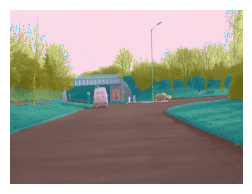

In [ ]:
# Show a batch to verify everything looks good
dls.show_batch(max_n=4, nrows=1)

In [ ]:
# Define and train the model
learn = unet_learner(dls, resnet34)
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,3.357786,None,03:56


epoch,train_loss,valid_loss,time
0,36.951988,None,05:48
1,18.816635,None,04:04


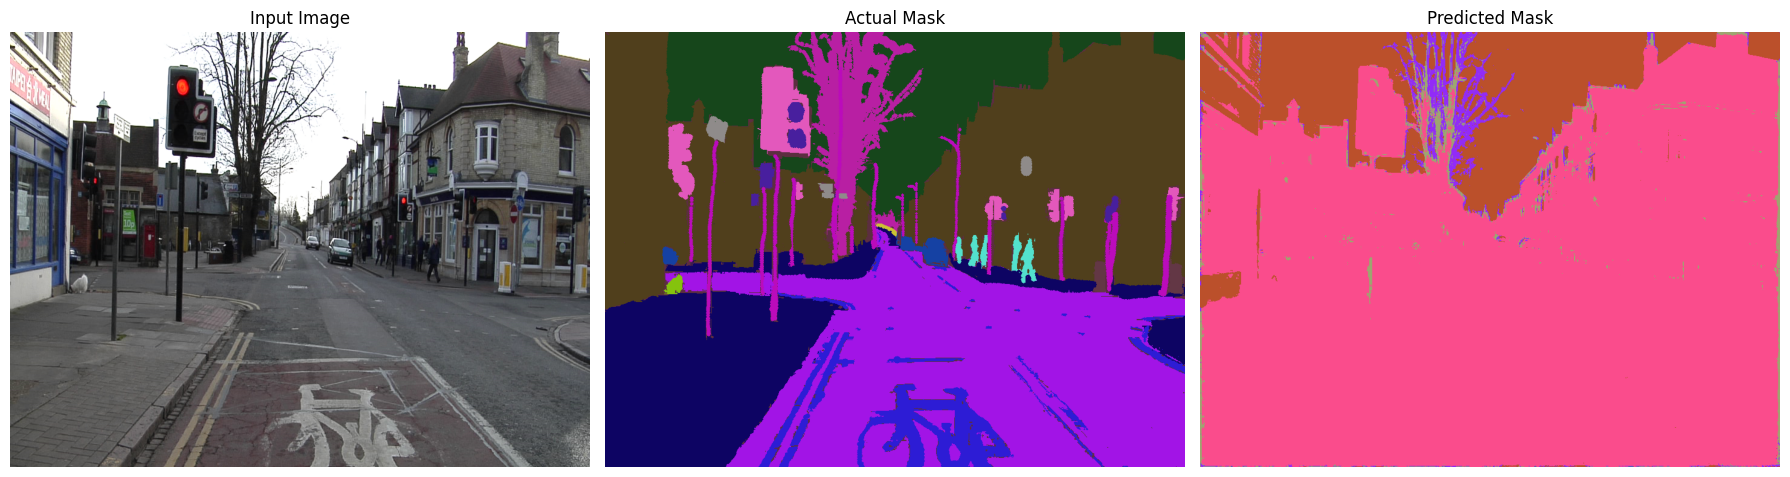

In [ ]:
from fastai.vision.all import *

# Assuming 'learn' is your trained Learner and 'dls' is your DataLoader
# Get a batch of data
batch = dls.one_batch()
inputs, targets = batch[:2]  # Inputs and actual targets

# Make predictions
preds, _ = learn.get_preds(dl=[(inputs, targets)])
# Decode the raw predictions to class indexes
dec_preds = preds.argmax(dim=1).unsqueeze(1)

# You should replace these with your actual statistics used for normalization
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Function to denormalize the image
def denormalize(x, mean=mean, std=std):
    return x.float() * std[:, None, None] + mean[:, None, None]

def decode_segmentation_mask(mask, n_classes):
    # This function assumes mask is a 2D tensor where each value is the predicted class index
    # If your batch size is more than 1, make sure to select a single mask from the batch
    mask = mask.squeeze()  # This will ensure it is 2D by removing any dimensions of size 1

    # Generate random colors for each class
    label_colors = np.array([(random.randint(0,255), random.randint(0,255), random.randint(0,255)) for _ in range(n_classes)])

    # Create a blank RGB image with the same height and width as the mask
    color_img = np.zeros((*mask.size(), 3), dtype=np.uint8)

    # Assign each class a random color
    for label in range(n_classes):
        color_img[mask == label] = label_colors[label]
    return color_img

def show_predictions(inputs, targets, preds, mean, std, n_classes):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Denormalized image
    img = denormalize(inputs[0]).permute(1, 2, 0)
    img = img.numpy()
    img = np.clip(img, 0, 1)
    axs[0].imshow(img)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    # True mask
    true_mask = decode_segmentation_mask(targets[0], n_classes)
    axs[1].imshow(true_mask)
    axs[1].set_title('Actual Mask')
    axs[1].axis('off')

    # Predicted mask
    pred_mask = decode_segmentation_mask(preds[0], n_classes)
    axs[2].imshow(pred_mask)
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

n_classes = 32 # replace with the actual number of classes in your segmentation task

# Show the predictions
show_predictions(inputs, targets, dec_preds, mean, std, n_classes)

Pertaining to the resourse limitations the results seem tobe heavily affected.

## Iris Tabular Task

In [ ]:
from fastai.tabular.all import *
import seaborn as sns

# Load the Iris dataset
df = sns.load_dataset('iris')

In [ ]:
# Define the transformations and the `TabularPandas` object
procs = [Categorify, FillMissing, Normalize]

# Define which columns are categorical, which is the dependent variable, and which (if any) are continuous
cat_names = ['species']
cont_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_names = 'species'

In [ ]:
# Split the data into a training and validation set
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

# Prepare the `TabularPandas` object
to = TabularPandas(df, procs, cat_names, cont_names, y_names=y_names, splits=splits)

# Prepare the DataLoaders
dls = to.dataloaders(bs=64)

In [ ]:
# Create a Learner
learn = tabular_learner(dls, metrics=accuracy)

# Train the model
learn.fit_one_cycle(40)

epoch,train_loss,valid_loss,accuracy,time
0,1.407127,1.117308,0.400000,00:00
1,1.390168,1.115747,0.400000,00:00
2,1.381821,1.111258,0.400000,00:00
3,1.346834,1.101314,0.400000,00:00
4,1.300030,1.084635,0.400000,00:00
5,1.241976,1.060276,0.666667,00:00
6,1.176946,1.026120,0.833333,00:00
7,1.104822,0.983566,0.966667,00:00
8,1.030304,0.933967,0.933333,00:00
9,0.954754,0.878600,0.933333,00:00


In [ ]:
# Save the learner for later use
learn.export('iris_learner.pkl')

# Load the learner back
learn_loaded = load_learner('iris_learner.pkl')

# Make a prediction on a new item
row, clas, probs = learn_loaded.predict(df.iloc[0])

print(f"Predicted class: {clas}, probabilities: {probs}")
print(f"Actual data: {row}")

Predicted class: 0, probabilities: tensor([0.9738, 0.0163, 0.0099])
Actual data:    species  sepal_length  sepal_width  petal_length  petal_width  species
0      0.0      -0.93199     1.025203     -1.334741    -1.314568      0.0


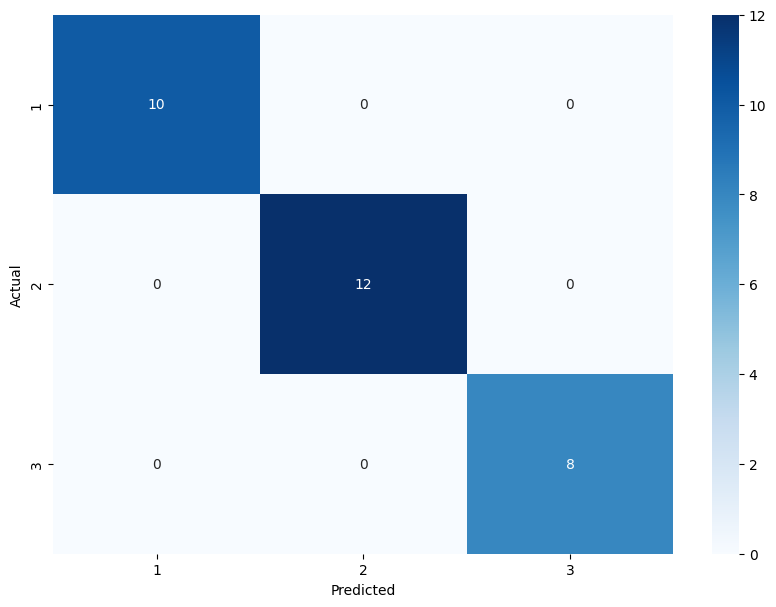

In [ ]:
from fastai.tabular.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions and the targets
val_preds, val_targets = learn.get_preds()

# Convert predictions to class indices
val_preds = val_preds.argmax(dim=1)

# Compute confusion matrix
cm = confusion_matrix(val_targets, val_preds)

# Plot using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

So, we succesfully made a perfect predictor for the well known Iris Dataset.

## Movie Recommendation

In [ ]:
from fastai.collab import *
from fastai.tabular.all import *

# Download the MovieLens 100k dataset
path = untar_data(URLs.ML_100k)

# Load the data
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])

In [ ]:
# We'll use the 'user', 'movie', and 'rating' columns
ratings = ratings[['user', 'movie', 'rating']]

# Create a DataLoaders object
dls = CollabDataLoaders.from_df(ratings, user_name='user', item_name='movie', rating_name='rating', bs=64)

We're using colabrative filtering for the recommendation task

In [ ]:
# Create and train a collaborative filtering model
learn = collab_learner(dls, n_factors=50, y_range=(0,5.5))

# Train the model
learn.fit_one_cycle(5, 5e-3)

# Show some example predictions
learn.show_results()

epoch,train_loss,valid_loss,time
0,0.904914,0.931218,00:13
1,0.785104,0.859778,00:11
2,0.627466,0.868850,00:11
3,0.396060,0.890810,00:11
4,0.284793,0.898490,00:11


,user,movie,rating,rating_pred
0,542,1,4,3.961072
1,524,1048,2,3.346046
2,588,154,4,4.492545
3,56,42,4,3.738570
4,830,739,4,3.969457
5,693,651,3,3.559365
6,72,553,5,3.848944
7,675,427,5,4.784566
8,664,179,4,3.602167


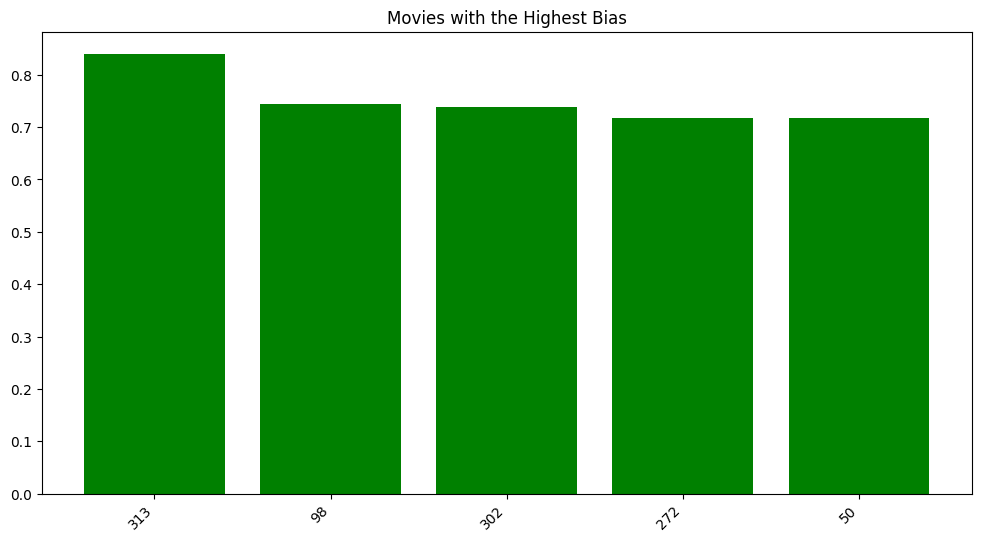

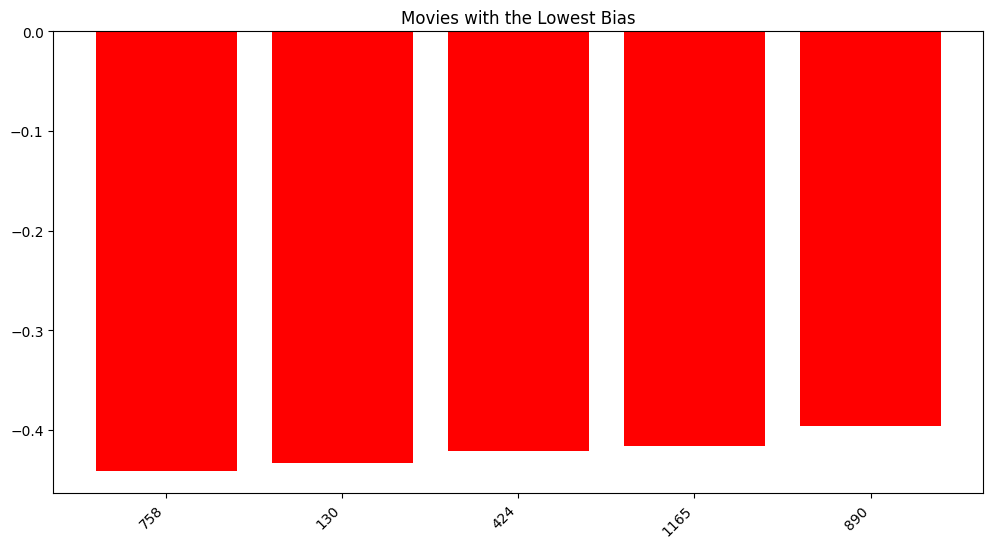

In [ ]:
import matplotlib.pyplot as plt

# Get movie biases and detach from the current graph
movie_bias = learn.model.i_bias.weight.squeeze().detach()

if movie_bias.is_cuda:
    movie_bias = movie_bias.cpu()

# Convert to numpy for further processing
movie_bias = movie_bias.numpy()

# Combine biases with movie titles, now using NumPy array
movie_ratings = [(bias, movies[i]) for i, bias in enumerate(movie_bias)]

# Sort movies by highest bias (movies that are generally liked)
highest_bias = sorted(movie_ratings, key=lambda x: x[0], reverse=True)[:5]
# Sort movies by lowest bias (movies that are generally disliked)
lowest_bias = sorted(movie_ratings, key=lambda x: x[0])[:5]

# Plot highest biases
plt.figure(figsize=(12,6))
plt.bar(range(len(highest_bias)), [x[0] for x in highest_bias], color='green')
plt.xticks(range(len(highest_bias)), [x[1] for x in highest_bias], rotation=45, ha='right')
plt.title('Movies with the Highest Bias')
plt.show()

# Plot lowest biases
plt.figure(figsize=(12,6))
plt.bar(range(len(lowest_bias)), [x[0] for x in lowest_bias], color='red')
plt.xticks(range(len(lowest_bias)), [x[1] for x in lowest_bias], rotation=45, ha='right')
plt.title('Movies with the Lowest Bias')
plt.show()